# Dự đoán khả năng mắc bệnh của người dân dựa trên mô hình học máy


*  Lý do chọn đề tài:
    - Lý do khách quan: Ngày nay y học càng ngày càng phát triển , số lượng người mắc bện cũng như nhu cầu khám chữa bệnh tim cũng ngày càng nhiều , việc ứng dụng các mô hình khoa học dữ liêu vào để chuẩn đoán bệnh là một vấn đề đang rất được quan tâm.
    - Lý do chủ quan : Ngay từ ban đầu thuyết trình định hướng con đường tương lai , nhóm em đã nhận định về xu hướng phát triển trong tương lai của lĩnh vực DataScience là ứng dụng cao vào y tế.

*  Mô tả bài toán : Bìa toán sử dụng một tập DataSet với thông tin là các chỉ số của người bệnh và một cột mang tính kết luận là bệnh hay không bệnh . Sau đó sử dụng ML để xây dựng mô hình dự đoán kết quả.
link dataset nhóm em lấy trên này ạ
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset



In [ ]:
# đọc file
import pandas as pd
df = pd.read_csv('heart.csv')
# hiện 10 dòng đầu
df.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


# Mô tả thông tin chi tiết dữ liệu
 Thông tin chi tiết các cột:
1. age : tuổi
2. sex : giới tính 9 ( 0/1)
3. cp : mức độ đau tức ngực ( 0/1/2/3)
4. trestbps : huyết áp lúc nghỉ ngơi của người bệnh
5. chol : lượng cholesterol trong máu
6. fbs :  lượng đường trong máu ( 0/ 1 )
7. restecg : kết quả điện tâm đồ (0/1/2)
8. thalach : nhịp tim
9. exang : đau thắt ngực khi tập thể dục (0/1)
10. oldpeak : tình trạng stress khi tập thể dục
11. slope : độ dốc của ST khi tập thể dục ( 0/1/2)
12. ca : số lương các mạch máu chính (0-3)
13. thal : 1: bình thường , 2: khiếm khuyết cố định ,
3: khuyết tật có thể chữa trị
14. target : kết quả mắc bệnh với hai giá trị là 1 và 0
 đại diện cho có và không , target này chính là thuộc
 tính nhãn cần dự đoán , tất cả còn lại đều là thuộc tính mô tả .


# Tiến hành phân tích các thuộc tính của bộ dữ liệu

In [ ]:
# thông tin về số dòng và số cột của bộ dữ liệu
print("Số dòng của bộ dữ liệu là ", df.shape[0])
print()
print("Số cột của dòng dữ liệu là ", df.shape[1])


Số dòng của bộ dữ liệu là  1025

Số cột của dòng dữ liệu là  14


In [ ]:
# Kiểm trs dữ liệu thiếu
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Từ kết quả trên cho thấy : Bộ dữ liệu có 14 cột và 1025 dòng và toàn bộ là dữ liệu sạch

In [ ]:
#Thông tin về các cột  các thuộc tính của bộ dữ liệu
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
#Thống kê mô tả cơ bản các thuộc tính
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Text(0.5, 1.0, 'Histogram target')

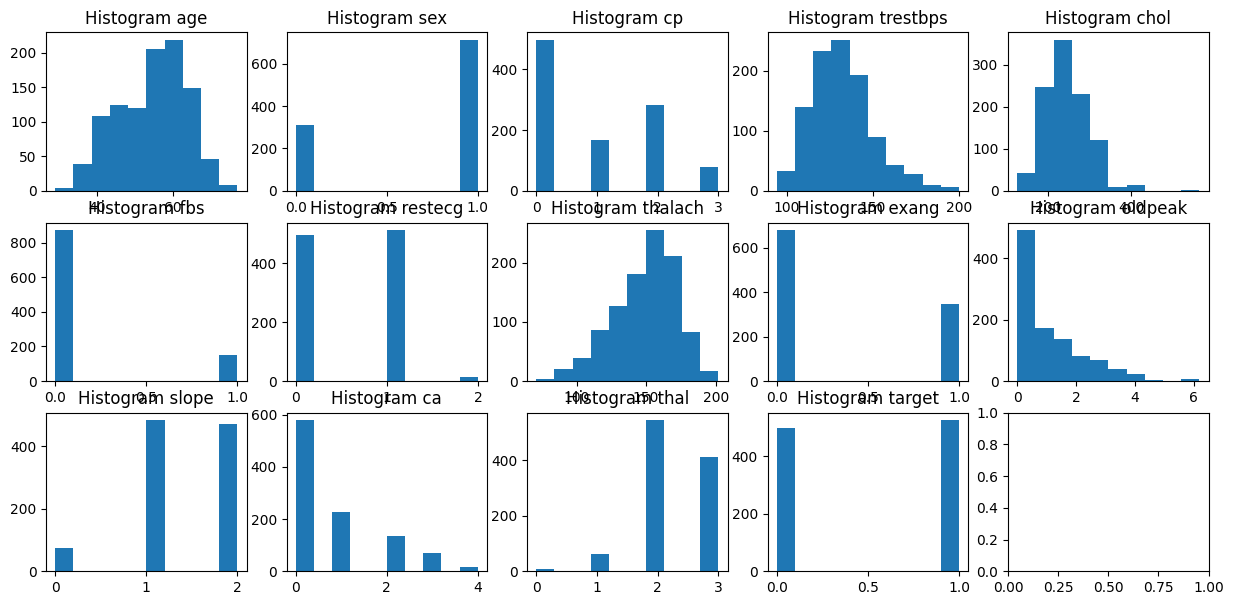

In [ ]:
# Trực quan dữ liệu để dễ quan sát hơn
# Khai báo thư viện

import matplotlib.pyplot as plt
import numpy as np
figure, axis = plt.subplots(3, 5, figsize=(15, 7))
axis[0, 0].hist(df['age'])
axis[0, 0].set_title("Histogram age")

axis[0, 1].hist(df['sex'])
axis[0, 1].set_title("Histogram sex")

axis[0, 2].hist(df['cp'])
axis[0, 2].set_title("Histogram cp")

axis[0, 3].hist(df['trestbps'])
axis[0, 3].set_title("Histogram trestbps")

axis[0, 4].hist(df['chol'])
axis[0, 4].set_title("Histogram chol")

axis[1, 0].hist(df['fbs'])
axis[1, 0].set_title("Histogram fbs")

axis[1, 1].hist(df['restecg'])
axis[1, 1].set_title("Histogram restecg")

axis[1, 2].hist(df['thalach'])
axis[1, 2].set_title("Histogram thalach")

axis[1, 3].hist(df['exang'])
axis[1, 3].set_title("Histogram exang")

axis[1, 4].hist(df['oldpeak'])
axis[1, 4].set_title("Histogram oldpeak")

axis[2, 0].hist(df['slope'])
axis[2, 0].set_title("Histogram slope")

axis[2, 1].hist(df['ca'])
axis[2, 1].set_title("Histogram ca")

axis[2, 2].hist(df['thal'])
axis[2, 2].set_title("Histogram thal")


axis[2, 3].hist(df['target'])
axis[2, 3].set_title("Histogram target")


Text(0.5, 1.0, 'Heatmap ')

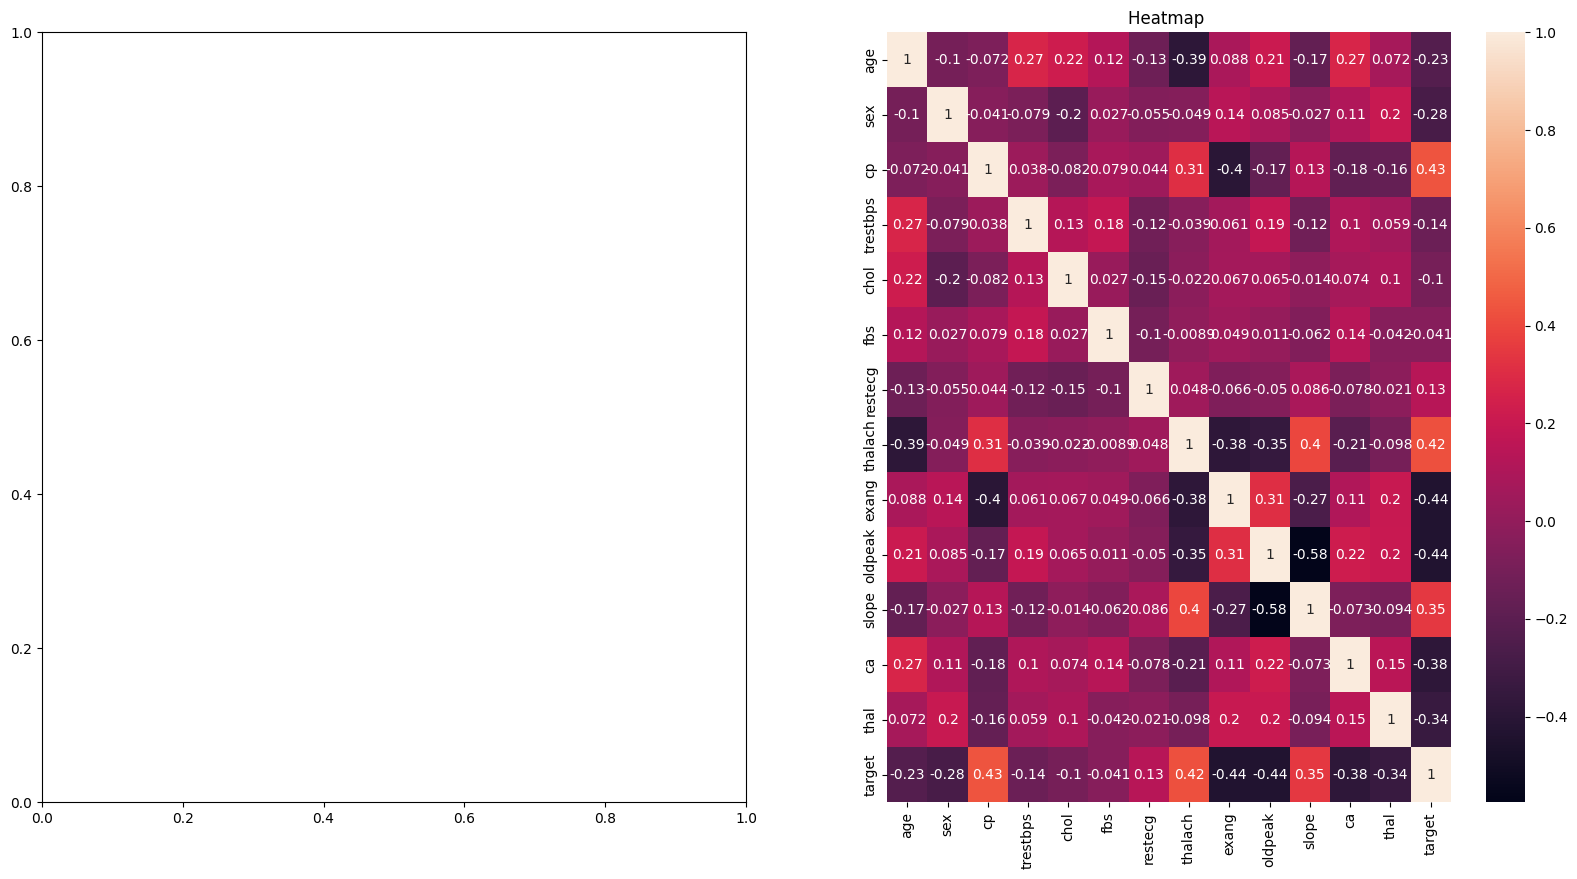

In [ ]:
#Trực quan độ tương quan giữa các cột
import seaborn as sns
figure, axis = plt.subplots(1, 2, figsize=(20, 10))
axis[0]= sns.heatmap(df.corr(), annot = True)
axis[0].set_title("Heatmap ")


# Tiền xử lý dữ liệu và xây dựng mô hình
1. Như đã nói ở phần đầu thì cột target là cột cần dự đoán ( thuộc tính nhãn ) và các cột còn lại sẽ là các đặc trưng đầu vào ( thuộc tính mô tả )

2. Đối với phần tiền xử lý dữ liệu , thì đây là bộ dữ liệu sạch ( dữ liệu được mã hóa và không có giá tri thiếu )

3. Đối với bài toán dự đoán khả năng mắc bệnh của người dân thì việc cân bằng số nhãn sẽ giúp việc huấn luyện mô hình  trở nên chính xác hơn , tránh trường hợp overfitting . Như biểu đồ Histogram ở phần bên trên thì hai nhãn 0 , 1 chênh lệch nhau không nhiều  , nhưng để đảm bảo tính chính xác cho mô hình thì nhóm em quyết định sử dụng undersamplingdata - lấy số lượng 2 nhãn bằng nhau

4.  Việc đưa tất cả các thuộc tính mô tả vào mô hình thì không phải cách hay .Cách đơn giản nhất để lựa chọn đặc trưng đầu vào có hiệu quả  là sử dụng độ tương quan , ở đồ thi heatmap thì độ tương quan giữa các cột không quá cao nên cách này không khả thi. Nhóm em quyết định sủ dụng kỹ thuật feature selection để chọn lọc các đặc trưng tốt với mục đích tăng độ chính xác của mô hình lên cao nhất có thể


In [ ]:
#cân bằng dữ liệu :
df['target'].value_counts()


In [ ]:
# Tiến hành lấy 2 mẫu 0 và 1 đều giống nhau = 499 giá trị
df_class_0_under = df_class_0.sample(499)
#sau khi lấy mẫu bằng nhau xong , tiến hành hợp nhất dữ liệu
concat_df = pd.concat([df_class_1, df_class_0_under])
# hiển thị vài dòng dữ liệu để xem kết quả sau khi hợp nhất
concat_df.head()

In [ ]:
# Tiến hành sử dụng kỹ thuật feature selection để chọn lọc , trích xuất các đặc trưng
# cần lấy ra các cột target ( thuộc tính nhãn )
labels = concat_df['target']
# lấy ra các thuộc tính mô tả
value = concat_df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
# khai báo thư viện
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Tiến hành sử dụng kỹ thuật feature selection
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(value,labels)
dfscores = np.array(fit.scores_)
dfcolumns = np.array(value.columns)
# tạo dataframe để xem dữ liệu dễ hơn
featureScores = pd.DataFrame({"Feature":dfcolumns, "Scores":dfscores})
featureScores['Scores'] = featureScores['Scores'].apply(lambda x : round(x,2))
featureScores = featureScores.sort_values(['Scores'],ascending = False)




,Feature,Scores
7,thalach,650.01
9,oldpeak,253.65
2,cp,217.82
11,ca,210.63
8,exang,130.47
4,chol,110.72
0,age,81.43
3,trestbps,45.97
10,slope,33.67
1,sex,24.37


Nhận Xét : sau khi sử dụng kỹ thuật feature selection  thì có thể thấy các cột thalach , oldpeak , cp, ca cho kết quả tương đối cao hơn so với phần còn lại cho nên em quyết định lấy những cột đó làm dữ liệu đầu vào cho bài toán

# Tiến hành xây dựng các mô hình
1. LogisticRegression : Ý tưởng cơ bản của Logistic Regression là tính toán giá trị của một hàm logistic (còn được gọi là sigmoid function) dựa trên các biến đầu vào (features). Hàm sigmoid chuyển đổi đầu vào thành một giá trị nằm trong khoảng từ 0 đến 1, mô tả xác suất của mẫu thuộc vào một nhóm nhất định.

2. DecisionTreeClassifier: mô hình phân loại , thuộc học máy có giám sát,,nó không tồn tại phương trình dự báo , nótìm ra một cây quyết định dự báo tốt trên tập huấn luyện , sử dụng cây quyết định này dự báo trên tập kiểm tra .

3. RandomForestClassifier: xây dựng nhiều cây quyết định bằng thuật toán DecisionTree , tuy nhiên mỗi cây quyết định sẽ khác nhau , sau đó sẽ tổng hợp kết quả dự đoán từ các cây quyết định này

4. KNeighborsClassifier : đây là mô hình đơn giản nhất trong học máy , nó lưu trữ dữ liệu huấn luyện và dự đoán tập dữ liệu mới dựa trên việc tìm ra những điểm dữ liệu láng giềng trong dữ liệu tập huấn.

In [ ]:
#khai báo thư viện
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


In [ ]:
# chia tập dữ liệu thành 2 tập train và test với tỉ lệ 7:3
# trong mô hình machine learning đầy đủ thì tập data này phải chia thành bộ dữ liệu train data, validation data, testdata. theo tủ lệ 7:2:1

x = concat_df[['thalach','oldpeak','cp','ca']]
y = concat_df['target']
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# để random_state trộn dữ liệu lên tránh  trường hợp overfiting

In [ ]:
#train các mô hình
logistic_model = LogisticRegression().fit(x_train, y_train)
de_model = DecisionTreeClassifier().fit(x_train, y_train)
random_model = RandomForestClassifier().fit(x_train, y_train)
knn_model = KNeighborsClassifier().fit(x_train, y_train)


# Nghiệm thu kết quả

In [ ]:
!pip install --upgrade scikit-learn


In [ ]:
#khai báo thư viện
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


In [ ]:
# nghiệm thu kết quả các mô hình trên tập train
# model logistic thông số kỹ thuật
pre_y = logistic_model.predict(x_train)
target_names = ['class 0', 'class 1']
print(classification_report(y_train,pre_y,target_names= target_names))

              precision    recall  f1-score   support

     class 0       0.83      0.78      0.80       355
     class 1       0.79      0.84      0.82       362

    accuracy                           0.81       717
   macro avg       0.81      0.81      0.81       717
weighted avg       0.81      0.81      0.81       717



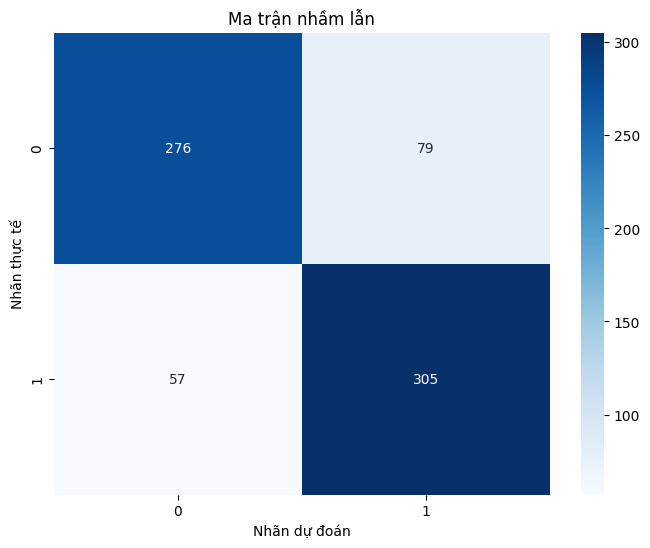

In [ ]:
# confuse matrix của logistic
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, x_data, y_data):
    # Tính toán dự đoán
    y_pred = model.predict(x_data)
    # Lấy các nhãn duy nhất
    labels = np.unique(y_data)
    # Tính toán ma trận nhầm lẫn
    cm = confusion_matrix(y_data, y_pred, labels=labels)

    # Vẽ ma trận nhầm lẫn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Nhãn dự đoán')
    plt.ylabel('Nhãn thực tế')
    plt.title('Ma trận nhầm lẫn')
    plt.show()

# Gọi hàm plot_confusion_matrix với mô hình logistic_model, dữ liệu x_train và nhãn y_train
plot_confusion_matrix(logistic_model, x_train, y_train)

In [ ]:
# model decisiontree  thông số kỹ thuật
pre_y2 = de_model.predict(x_train)
target_names = ['class 0', 'class 1']
print(classification_report(y_train,pre_y2,target_names= target_names))


              precision    recall  f1-score   support

     class 0       0.99      1.00      1.00       355
     class 1       1.00      0.99      1.00       362

    accuracy                           1.00       717
   macro avg       1.00      1.00      1.00       717
weighted avg       1.00      1.00      1.00       717



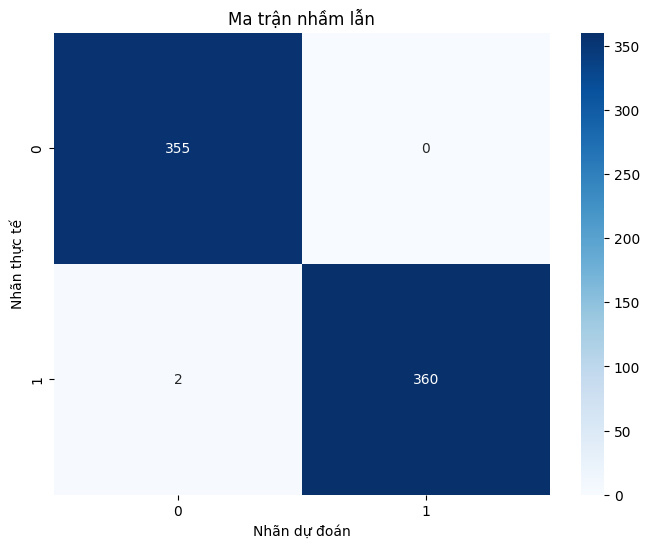

In [ ]:
# confuse matrix của decisiontree
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, x_data, y_data):
    # Tính toán dự đoán
    y_pred = model.predict(x_data)
    # Lấy các nhãn duy nhất
    labels = np.unique(y_data)
    # Tính toán ma trận nhầm lẫn
    cm = confusion_matrix(y_data, y_pred, labels=labels)

    # Vẽ ma trận nhầm lẫn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Nhãn dự đoán')
    plt.ylabel('Nhãn thực tế')
    plt.title('Ma trận nhầm lẫn')
    plt.show()

# Gọi hàm plot_confusion_matrix với mô hình logistic_model, dữ liệu x_train và nhãn y_train
plot_confusion_matrix(de_model, x_train, y_train)

In [ ]:
# model random  thông số kỹ thuật
pre_y3 = random_model.predict(x_train)
target_names = ['class 0', 'class 1']
print(classification_report(y_train,pre_y3,target_names= target_names))

              precision    recall  f1-score   support

     class 0       0.99      1.00      1.00       355
     class 1       1.00      0.99      1.00       362

    accuracy                           1.00       717
   macro avg       1.00      1.00      1.00       717
weighted avg       1.00      1.00      1.00       717



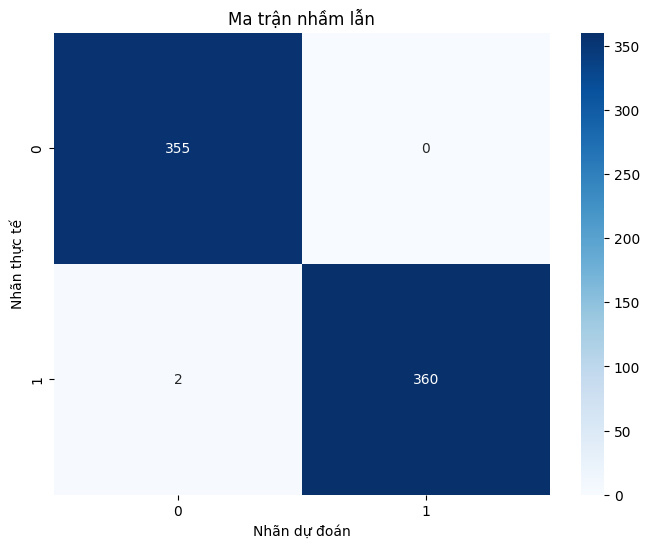

In [ ]:
# confuse matrix của random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, x_data, y_data):
    # Tính toán dự đoán
    y_pred = model.predict(x_data)
    # Lấy các nhãn duy nhất
    labels = np.unique(y_data)
    # Tính toán ma trận nhầm lẫn
    cm = confusion_matrix(y_data, y_pred, labels=labels)

    # Vẽ ma trận nhầm lẫn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Nhãn dự đoán')
    plt.ylabel('Nhãn thực tế')
    plt.title('Ma trận nhầm lẫn')
    plt.show()

# Gọi hàm plot_confusion_matrix với mô hình logistic_model, dữ liệu x_train và nhãn y_train
plot_confusion_matrix(random_model, x_train, y_train)

In [ ]:
# model knn  thông số kỹ thuật
pre_y4 = knn_model.predict(x_train)
target_names = ['class 0', 'class 1']
print(classification_report(y_train,pre_y4,target_names= target_names))

              precision    recall  f1-score   support

     class 0       0.94      0.90      0.92       355
     class 1       0.91      0.94      0.92       362

    accuracy                           0.92       717
   macro avg       0.92      0.92      0.92       717
weighted avg       0.92      0.92      0.92       717



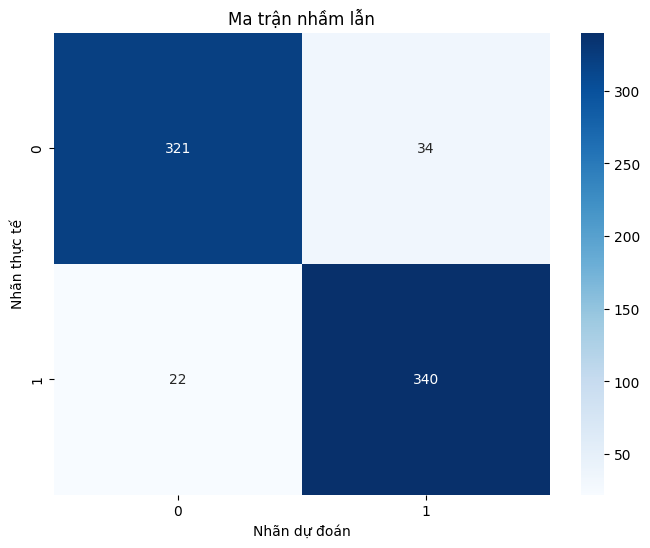

In [ ]:
# confuse matrix của knn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, x_data, y_data):
    # Tính toán dự đoán
    y_pred = model.predict(x_data)
    # Lấy các nhãn duy nhất
    labels = np.unique(y_data)
    # Tính toán ma trận nhầm lẫn
    cm = confusion_matrix(y_data, y_pred, labels=labels)

    # Vẽ ma trận nhầm lẫn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Nhãn dự đoán')
    plt.ylabel('Nhãn thực tế')
    plt.title('Ma trận nhầm lẫn')
    plt.show()

# Gọi hàm plot_confusion_matrix với mô hình logistic_model, dữ liệu x_train và nhãn y_train
plot_confusion_matrix(knn_model, x_train, y_train)



*   NHẬN XÉT  : Đối với tập train , các mô hình đều cho kết quả tương đối cao  , đặc biệt với mô hình cây quyết định và randomforest thì có độ chính xác tuyệt đối




# Sử dụng mô hình với tập test và tiến hành đánh giá kết quả

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
# model logistic  thông số kỹ thuật trên tập test
pre_test1 = logistic_model.predict(x_test)
target_names = ['class 0', 'class 1']
print(classification_report(y_test,pre_test1,target_names= target_names))


              precision    recall  f1-score   support

     class 0       0.83      0.72      0.77       144
     class 1       0.78      0.87      0.82       164

    accuracy                           0.80       308
   macro avg       0.80      0.79      0.80       308
weighted avg       0.80      0.80      0.80       308



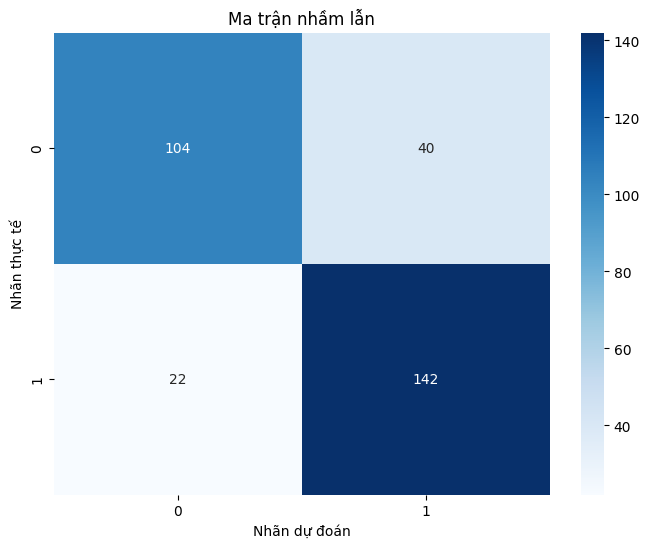

In [ ]:
# confuse matrix của logistic model trên tập test
def plot_confusion_matrix(model, x_data, y_data):
    # Tính toán dự đoán
    y_pred = model.predict(x_data)
    # Lấy các nhãn duy nhất
    labels = np.unique(y_data)
    # Tính toán ma trận nhầm lẫn
    cm = confusion_matrix(y_data, y_pred, labels=labels)

    # Vẽ ma trận nhầm lẫn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Nhãn dự đoán')
    plt.ylabel('Nhãn thực tế')
    plt.title('Ma trận nhầm lẫn')
    plt.show()

# Gọi hàm plot_confusion_matrix với mô hình logistic_model, dữ liệu x_train và nhãn y_train
plot_confusion_matrix(logistic_model, x_test, y_test)


In [ ]:
# model cây quyết định thông số kỹ thuật trên tập test
pre_test2 = de_model.predict(x_test)
target_names = ['class 0', 'class 1']
print(classification_report(y_test,pre_test2,target_names= target_names))

              precision    recall  f1-score   support

     class 0       0.97      1.00      0.98       144
     class 1       1.00      0.97      0.98       164

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



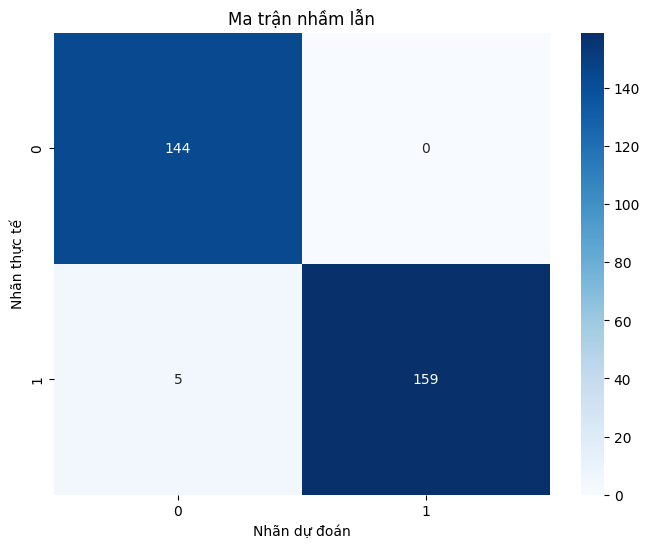

In [ ]:
# confuse matrix của cây quyết định model trên tập test
def plot_confusion_matrix(model, x_data, y_data):
    # Tính toán dự đoán
    y_pred = model.predict(x_data)
    # Lấy các nhãn duy nhất
    labels = np.unique(y_data)
    # Tính toán ma trận nhầm lẫn
    cm = confusion_matrix(y_data, y_pred, labels=labels)

    # Vẽ ma trận nhầm lẫn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Nhãn dự đoán')
    plt.ylabel('Nhãn thực tế')
    plt.title('Ma trận nhầm lẫn')
    plt.show()

# Gọi hàm plot_confusion_matrix với mô hình logistic_model, dữ liệu x_train và nhãn y_train
plot_confusion_matrix(de_model, x_test, y_test)

In [ ]:
# model random, thông số kỹ thuật trên tập test
pre_test3 = random_model.predict(x_test)
target_names = ['class 0', 'class 1']
print(classification_report(y_test,pre_test3,target_names= target_names))

              precision    recall  f1-score   support

     class 0       0.97      1.00      0.98       144
     class 1       1.00      0.97      0.98       164

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



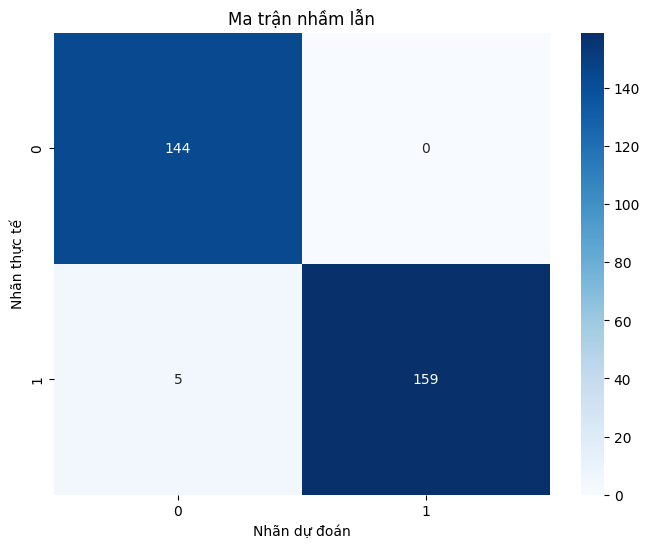

In [ ]:
# confuse matrix của random model trên tập test
def plot_confusion_matrix(model, x_data, y_data):
    # Tính toán dự đoán
    y_pred = model.predict(x_data)
    # Lấy các nhãn duy nhất
    labels = np.unique(y_data)
    # Tính toán ma trận nhầm lẫn
    cm = confusion_matrix(y_data, y_pred, labels=labels)

    # Vẽ ma trận nhầm lẫn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Nhãn dự đoán')
    plt.ylabel('Nhãn thực tế')
    plt.title('Ma trận nhầm lẫn')
    plt.show()

# Gọi hàm plot_confusion_matrix với mô hình logistic_model, dữ liệu x_train và nhãn y_train
plot_confusion_matrix(random_model, x_test, y_test)

In [ ]:
# model KNN, thông số kỹ thuật trên tập test
pre_test4 = knn_model.predict(x_test)
target_names = ['class 0', 'class 1']
print(classification_report(y_test,pre_test4,target_names= target_names))

              precision    recall  f1-score   support

     class 0       0.82      0.77      0.79       144
     class 1       0.81      0.85      0.83       164

    accuracy                           0.81       308
   macro avg       0.81      0.81      0.81       308
weighted avg       0.81      0.81      0.81       308



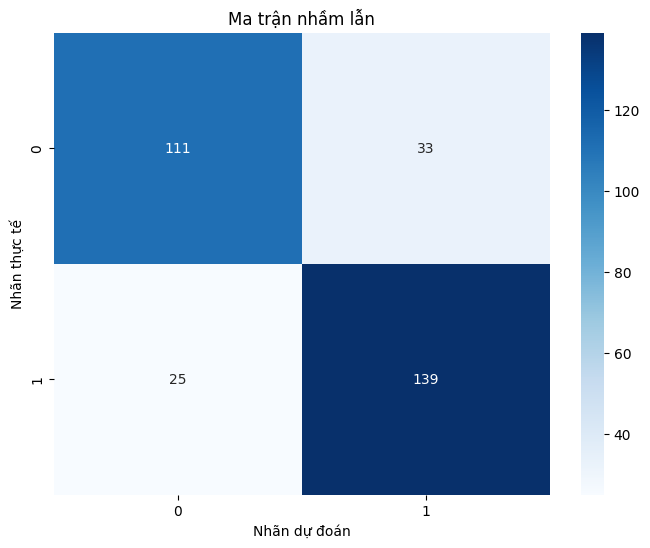

In [ ]:
# confuse matrix của knn model trên tập test
def plot_confusion_matrix(model, x_data, y_data):
    # Tính toán dự đoán
    y_pred = model.predict(x_data)
    # Lấy các nhãn duy nhất
    labels = np.unique(y_data)
    # Tính toán ma trận nhầm lẫn
    cm = confusion_matrix(y_data, y_pred, labels=labels)

    # Vẽ ma trận nhầm lẫn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Nhãn dự đoán')
    plt.ylabel('Nhãn thực tế')
    plt.title('Ma trận nhầm lẫn')
    plt.show()

# Gọi hàm plot_confusion_matrix với mô hình logistic_model, dữ liệu x_train và nhãn y_train
plot_confusion_matrix(knn_model, x_test, y_test)

# KẾT LUẬN : Sử dụng mô hình thuật toán Cây quyết định  DecisionTree và RandomForest đã cho ta kết quả đáng mong đợi, gần như tuyệt đối , vậy ta đã được 2 mô hình sau khi xây dựng xong có thể dự đoán về khả năng  mắc bệnh tim mạch.